# Convert OOI Parsed pwrsys JSON to NetCDF file
using CF-1.6, Discrete Sampling Geometry (DSG) conventions, **`featureType=timeSeries`**

In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np

from pyaxiom.netcdf.sensors import TimeSeries

In [2]:
infile = '/usgs/data2/notebook/data/20170130.superv.json'
infile = '/sand/usgs/users/rsignell/data/ooi/endurance/cg_proc/ce02shsm/D00004/buoy/pwrsys/20170208.pwrsys.json'

outfile = '/usgs/data2/notebook/data/20170208.pwrsys.nc'
with open(infile) as jf:
    js = json.load(jf)
    df = pd.DataFrame({})
    for k, v in js.items():
        df[k] = v
    df['time'] = pd.to_datetime(df.time, unit='s')
    df['depth'] = 0.
df.head()

,fuel_cell2_voltage,solar_panel3_state,wind_turbine2_state,battery_bank2_voltage,wind_turbine2_current,seawater_ground_state,battery_bank1_temperature,battery_bank4_temperature,main_current,wind_turbine1_current,...,solar_panel2_current,fuel_cell1_voltage,battery_bank3_voltage,solar_panel4_state,cvt_state,battery_bank1_current,wind_turbine2_voltage,fuel_cell1_current,error_flag2,depth
0,0.0,1,1,24.05,4.0,0,10.06,9.87,2753.33,0.0,...,192.0,0.0,24.08,1,0,368.0,24.08,0.0,00402000,0.0
1,0.0,1,1,24.04,4.0,0,10.06,9.87,2700.00,72.0,...,156.0,0.0,24.06,1,0,330.0,24.05,0.0,00402000,0.0
2,0.0,1,1,24.03,4.0,0,10.06,9.87,2620.00,0.0,...,184.0,0.0,24.05,1,0,324.0,24.05,0.0,00402000,0.0
3,0.0,1,1,24.03,4.0,0,10.06,9.87,2566.67,0.0,...,156.0,0.0,24.06,1,0,310.0,24.05,0.0,00402000,0.0
4,0.0,1,1,24.05,4.0,0,10.06,9.87,2193.33,0.0,...,174.0,0.0,24.08,1,0,218.0,24.08,0.0,00402000,0.0


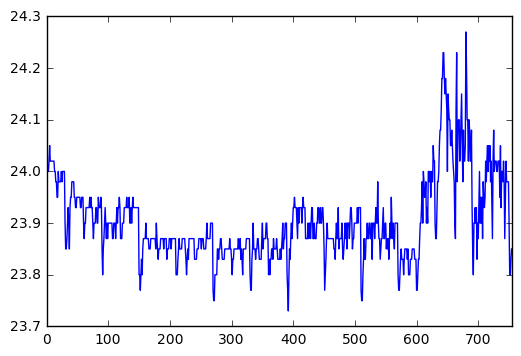

In [3]:
df['solar_panel4_voltage'].plot();

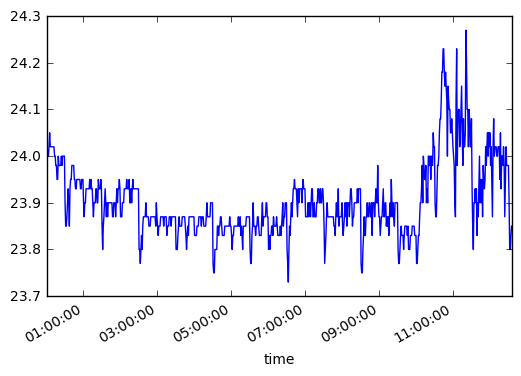

In [4]:
df.index = df['time']
df['solar_panel4_voltage'].plot();

### Define the NetCDF global attributes

In [5]:
global_attributes = {
    'institution':'Oregon State University', 
    'title':'OOI CE02SHSM Pwrsys Data',
    'summary':'OOI Pwrsys data from Coastal Endurance Oregon Shelf Surface Mooring',
    'creator_name':'Chris Wingard',
    'creator_email':'cwingard@coas.oregonstate.edu',
    'creator_url':'http://ceoas.oregonstate.edu/ooi'
}

### Create initial file

In [6]:
ts = TimeSeries(
    output_directory='.',
    latitude=44.64,
    longitude=-124.31,
    station_name='ce02shsm',
    global_attributes=global_attributes,
    times=df.time.values.astype(np.int64) // 10**9,
    verticals=df.depth.values,
    output_filename=outfile,
    vertical_positive='down'
)

### Add data variables

In [7]:
df.columns.tolist()

['fuel_cell2_voltage',
 'solar_panel3_state',
 'wind_turbine2_state',
 'battery_bank2_voltage',
 'wind_turbine2_current',
 'seawater_ground_state',
 'battery_bank1_temperature',
 'battery_bank4_temperature',
 'main_current',
 'wind_turbine1_current',
 'internal_current',
 'error_flag1',
 'wind_turbine1_voltage',
 'battery_bank3_temperature',
 'solar_panel1_state',
 'fuel_cell2_state',
 'battery_bank4_current',
 'solar_panel4_current',
 'solar_panel4_voltage',
 'seawater_ground_positve',
 'seawater_ground_negative',
 'solar_panel1_current',
 'battery_bank2_current',
 'wind_turbine1_state',
 'fuel_cell2_current',
 'external_voltage',
 'battery_bank3_current',
 'internal_voltage',
 'fuel_cell_volume',
 'solar_panel2_voltage',
 'main_voltage',
 'percent_charge',
 'time',
 'external_current',
 'cvt_temperature',
 'solar_panel1_voltage',
 'solar_panel3_voltage',
 'internal_temperature',
 'cvt_current',
 'fuel_cell1_state',
 'solar_panel2_state',
 'battery_bank4_voltage',
 'solar_panel3_curre

In [8]:
# create a dictionary of variable attributes
atts = {
        'main_current':{'units':'volts', 'long_name':'main current'},
        'solar_panel3_voltage':{'units':'volts', 'long_name':'solar panel 3 voltage'}
       }

In [9]:
print(atts.get('main_current'))

{'long_name': 'main current', 'units': 'volts'}


In [10]:
# if we ask for a key that doesn't exist, we get a value of "None"
print(atts.get('foobar'))

None


In [11]:
for c in df.columns:
    if c in ts._nc.variables:
        print("Skipping '{}' (already in file)".format(c))
        continue
    if c in ['time', 'lat', 'lon', 'depth', 'cpm_date_time_string']:
        print("Skipping axis '{}' (already in file)".format(c))
        continue
    if 'object' in df[c].dtype.name: 
        print("Skipping object {}".format(c))
        continue
        
    print("Adding {}".format(c))
    # add variable values and variable attributes here
    ts.add_variable(c, df[c].values, attributes=atts.get(c))


Adding fuel_cell2_voltage
Adding solar_panel3_state
Adding wind_turbine2_state
Adding battery_bank2_voltage
Adding wind_turbine2_current
Adding seawater_ground_state
Adding battery_bank1_temperature
Adding battery_bank4_temperature
Adding main_current
Adding wind_turbine1_current
Adding internal_current
Skipping object error_flag1
Adding wind_turbine1_voltage
Adding battery_bank3_temperature
Adding solar_panel1_state
Adding fuel_cell2_state
Adding battery_bank4_current
Adding solar_panel4_current
Adding solar_panel4_voltage
Adding seawater_ground_positve
Adding seawater_ground_negative
Adding solar_panel1_current
Adding battery_bank2_current
Adding wind_turbine1_state
Adding fuel_cell2_current
Adding external_voltage
Adding battery_bank3_current
Adding internal_voltage
Adding fuel_cell_volume
Adding solar_panel2_voltage
Adding main_voltage
Adding percent_charge
Skipping 'time' (already in file)
Adding external_current
Adding cvt_temperature
Adding solar_panel1_voltage
Adding solar_pane

In [12]:
df['error_flag3'][0]

'0f200000'

In [13]:
ts.ncd

<class 'pyaxiom.netcdf.dataset.EnhancedDataset'>
root group (NETCDF4 data model, file format HDF5):
    institution: Oregon State University
    creator_url: http://ceoas.oregonstate.edu/ooi
    creator_name: Chris Wingard
    title: OOI CE02SHSM Pwrsys Data
    summary: OOI Pwrsys data from Coastal Endurance Oregon Shelf Surface Mooring
    creator_email: cwingard@coas.oregonstate.edu
    Conventions: CF-1.6,ACDD-1.3
    date_created: 2017-02-10T22:21:00Z
    date_modified: 2017-02-10T22:21:00Z
    date_issued: 2017-02-10T22:21:00Z
    date_metadata_modified: 2017-02-10T22:21:00Z
    cdm_data_type: Station
    history: 2017-02-10T22:21:00Z - pyaxiom - File created using pyaxiom
    geospatial_lat_min: 44.64
    geospatial_lat_max: 44.64
    geospatial_lat_resolution: 0
    geospatial_lat_units: degrees_north
    geospatial_lon_min: -124.31
    geospatial_lon_max: -124.31
    geospatial_lon_resolution: 0
    geospatial_lon_units: degrees_east
    geospatial_bounds: POINT(-124.31 44.64)

In [14]:
import netCDF4
nc = netCDF4.Dataset(outfile)

In [15]:
nc['main_current']

<class 'netCDF4._netCDF4.Variable'>
float64 main_current(time)
    _FillValue: -9999.9
    coordinates: time z latitude longitude
    missing_value: -9999.9
    long_name: main current
    units: volts
    grid_mapping: crs
    platform: platform
    ancillary_variables: platform
    coverage_content_type: physicalMeasurement
unlimited dimensions: 
current shape = (755,)
filling on

In [16]:
nc.close()